# Interpolação por vizinho mais próximo

## Para redução


Matriz de Pixels da Imagem Original (Escala de Cinza):
Linhas: 400, Colunas: 400, Total de Elementos: 160000
[[254 254 254 ... 252 252 252]
 [254 254 254 ... 253 253 253]
 [254 254 254 ... 253 253 253]
 ...
 [ 18  19  20 ...  16  17  17]
 [ 20  20  20 ...  16  17  17]
 [ 19  18  17 ...  16  17  17]]

Matriz de Pixels da Imagem reduzida (Escala de Cinza):
Linhas: 200, Colunas: 200, Total de Elementos: 40000
[[254 254 254 ... 252 252 252]
 [254 254 254 ... 253 253 253]
 [254 254 254 ... 253 253 253]
 ...
 [ 19  22  22 ...  16  16  17]
 [ 16  21  19 ...  16  16  17]
 [ 20  20  21 ...  16  16  17]]


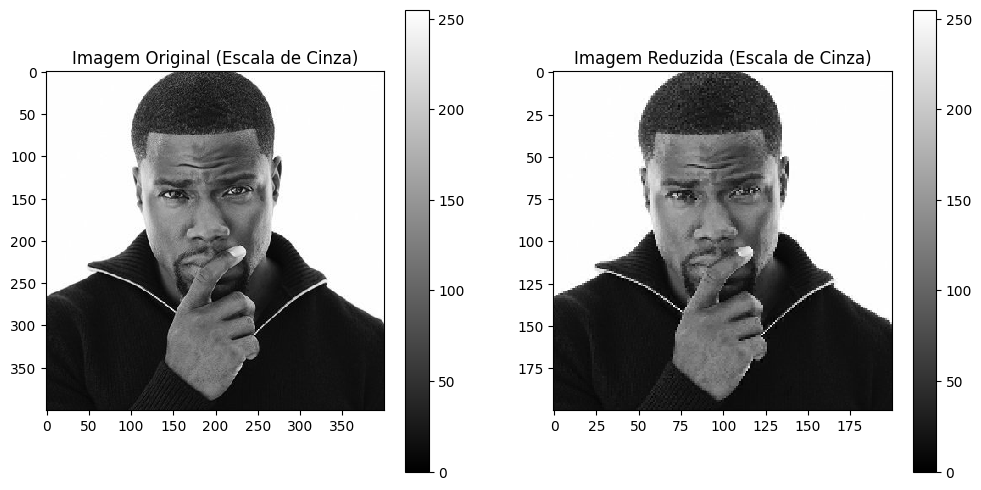

True

In [23]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Função para somar duas imagens pixel a pixel
def adicionar_imagens(imagem1, imagem2):
    # Garante que as imagens tenham o mesmo tamanho
    if imagem1.shape != imagem2.shape:
        raise ValueError("As imagens devem ter o mesmo tamanho")

    # Realiza a adição pixel a pixel das duas imagens
    imagem_soma = imagem1 + imagem2

    # Garante que os valores estejam no intervalo de 0 a 255
    imagem_soma = np.clip(imagem_soma, 0, 255)

    return imagem_soma.astype(np.uint8)

# Carrega as imagens em escala de cinza
imagem1 = cv2.imread('img/Kevin-hart.jpg', cv2.IMREAD_GRAYSCALE)
imagem2 = cv2.imread('img/Outra-imagem.jpg', cv2.IMREAD_GRAYSCALE)

# Verifica se as imagens foram carregadas corretamente
if imagem1 is None or imagem2 is None:
    raise ValueError("Não foi possível carregar uma ou ambas as imagens")

# Chama a função para somar as duas imagens
imagem_soma = adicionar_imagens(imagem1, imagem2)

# Informações das matrizes de pixels
n_linhas1, n_colunas1 = imagem1.shape[:2]
n_elementos1 = imagem1.size

n_linhas2, n_colunas2 = imagem2.shape[:2]
n_elementos2 = imagem2.size

n_linhas_soma, n_colunas_soma = imagem_soma.shape[:2]
n_elementos_soma = imagem_soma.size

# Printar as informações das matrizes
print(f"Matriz de Pixels da Imagem 1 (Escala de Cinza):")
print(f"Linhas: {n_linhas1}, Colunas: {n_colunas1}, Total de Elementos: {n_elementos1}")
print(imagem1)

print(f"\nMatriz de Pixels da Imagem 2 (Escala de Cinza):")
print(f"Linhas: {n_linhas2}, Colunas: {n_colunas2}, Total de Elementos: {n_elementos2}")
print(imagem2)

print(f"\nMatriz de Pixels da Imagem Soma (Escala de Cinza):")
print(f"Linhas: {n_linhas_soma}, Colunas: {n_colunas_soma}, Total de Elementos: {n_elementos_soma}")
print(imagem_soma)

# Plotar imagens como matrizes bidimensionais
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.title("Imagem 1 (Escala de Cinza)")
plt.imshow(imagem1, cmap='gray', interpolation='nearest')
plt.colorbar()

plt.subplot(1, 3, 2)
plt.title("Imagem 2 (Escala de Cinza)")
plt.imshow(imagem2, cmap='gray', interpolation='nearest')
plt.colorbar()

plt.subplot(1, 3, 3)
plt.title("Imagem Soma (Escala de Cinza)")
plt.imshow(imagem_soma, cmap='gray', interpolation='nearest')
plt.colorbar()

plt.show()

# Salvar a imagem resultante
cv2.imwrite('img/imagem_soma.jpg', imagem_soma)


## Vizinho mais próximo para ampliação

Matriz de Pixels da Imagem Original (Escala de Cinza):
Linhas: 400, Colunas: 400, Total de Elementos: 160000
[[254 254 254 ... 252 252 252]
 [254 254 254 ... 253 253 253]
 [254 254 254 ... 253 253 253]
 ...
 [ 18  19  20 ...  16  17  17]
 [ 20  20  20 ...  16  17  17]
 [ 19  18  17 ...  16  17  17]]

Matriz de Pixels da Imagem Ampliada (Escala de Cinza):
Linhas: 800, Colunas: 800, Total de Elementos: 640000
[[254 254 254 ... 252 252 252]
 [254 254 254 ... 252 252 252]
 [254 254 254 ... 253 253 253]
 ...
 [ 20  20  20 ...  17  17  17]
 [ 19  19  18 ...  17  17  17]
 [ 19  19  18 ...  17  17  17]]


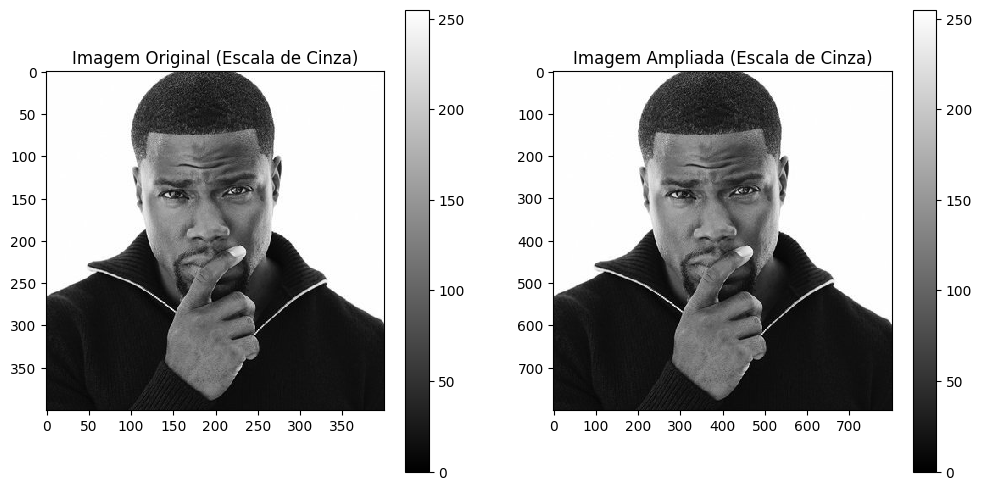

True

In [24]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def ampliar_imagem_vizinho_mais_proximo(imagem, escala):
    n_linhas, n_colunas = imagem.shape[:2]
    n_linhas_ampliada = int(n_linhas * escala)
    n_colunas_ampliada = int(n_colunas * escala)

    imagem_ampliada = np.zeros((n_linhas_ampliada, n_colunas_ampliada), dtype=imagem.dtype)

    for i in range(n_linhas_ampliada):
        for j in range(n_colunas_ampliada):
            # a divisão vai servir para conseguir o indice da imagem original para poder substituir na imagem apliada
            i_original = int(i / escala)
            j_original = int(j / escala)
            imagem_ampliada[i, j] = imagem[i_original, j_original]

    

    return imagem_ampliada

# carrega a imagem
imagem = cv2.imread('img/Kevin-hart.jpg', cv2.IMREAD_GRAYSCALE)

# define o fator escala (quanto vai ampliar, neste caso vai dobrar o tamanho)
escala = 2.0

# chamar a função com o algoritmo de ampliação
imagem_ampliada = ampliar_imagem_vizinho_mais_proximo(imagem, escala)

# ,shape vai retornar as dimensões da matriz (linha e coluna)
# .size vai retornar o total de elemtnos
n_linhas, n_colunas = imagem.shape[:2]
n_elementos_original = imagem.size

n_linhas_ampliada, n_colunas_ampliada = imagem_ampliada.shape[:2]
n_elementos_ampliada = imagem_ampliada.size

# printar as informações das matrizes
print(f"Matriz de Pixels da Imagem Original (Escala de Cinza):")
print(f"Linhas: {n_linhas}, Colunas: {n_colunas}, Total de Elementos: {n_elementos_original}")
print(imagem)

print(f"\nMatriz de Pixels da Imagem Ampliada (Escala de Cinza):")
print(f"Linhas: {n_linhas_ampliada}, Colunas: {n_colunas_ampliada}, Total de Elementos: {n_elementos_ampliada}")
print(imagem_ampliada)

# plotar imagens como matrizes bidimensionais
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Imagem Original (Escala de Cinza)")
plt.imshow(imagem, cmap='gray', interpolation='nearest')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title("Imagem Ampliada (Escala de Cinza)")
plt.imshow(imagem_ampliada, cmap='gray', interpolation='nearest')
plt.colorbar()

plt.show()

# baixar imagem ampliada
cv2.imwrite('img/imagem_ampliada.jpg', imagem_ampliada)


# Bilinear Redução


Dimensões da Imagem Original: (400, 400)
Dimensões da Imagem Reduzida: (200, 200)


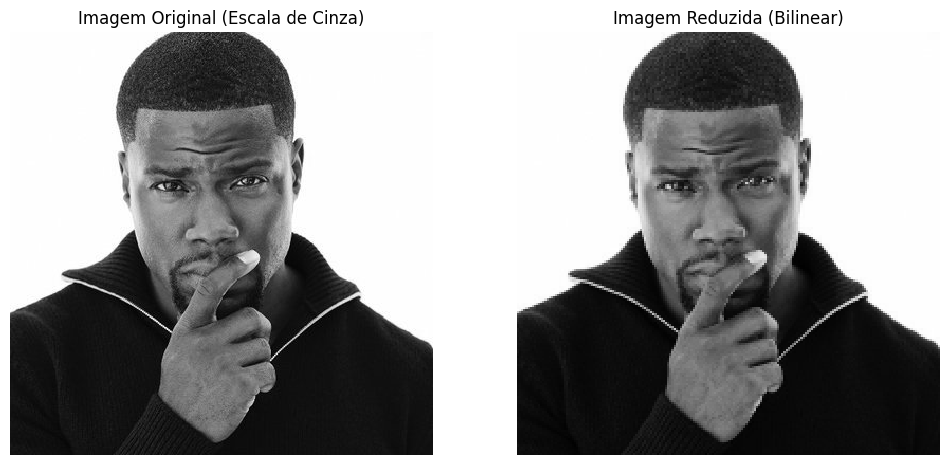

In [25]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def reduzir_imagem_bilinear_cinza(imagem, escala):
    # Obter as dimensões da imagem original
    altura_original, largura_original = imagem.shape
    nova_altura = int(altura_original * escala)
    nova_largura = int(largura_original * escala)

    # Inicializa a nova imagem com zeros
    nova_imagem = np.zeros((nova_altura, nova_largura), dtype=np.uint8)

    # Calcula as escalas para x e y
    escala_x = largura_original / nova_largura
    escala_y = altura_original / nova_altura

# 3. Terceiro Pixel da Imagem Reduzida (0, 2)
# Novo Pixel: (i=0, j=2)
# Mapeamento para o Original:
# x_mapeado = (2 + 0.5) * 2 - 0.5 = 4.5
# y_mapeado = (0 + 0.5) * 2 - 0.5 = 0.5
# x_int = int(4.5) = 4
# y_int = int(0.5) = 0
# Vizinhos:
# a = dados[0][4] = 30
# b = dados[0][5] = 30
# c = dados[1][4] = 20
# d = dados[1][5] = 30
# Interpolação:
# pixel_interpolado = 30 * (1-0.5) * (1-0.5) + 30 * 0.5 * (1-0.5) + 20 * (1-0.5) * 0.5 + 30 * 0.5 * 0.5 = 27.5
    for linha in range(nova_altura):
        for coluna in range(nova_largura):
            # Mapeia o pixel da nova imagem para a posição correspondente na imagem original
            x_mapeado = (coluna + 0.5) * escala_x - 0.5 # coluna 1
            y_mapeado = (linha + 0.5) * escala_y - 0.5 # linha 0

            # Converte para valores inteiros para acessar os pixels vizinhos
            x_int = int(x_mapeado)
            y_int = int(y_mapeado)

            # Previne o acesso a pixels fora dos limites da imagem original
            x_int = min(x_int, largura_original - 2)
            y_int = min(y_int, altura_original - 2)

            # Calcula as diferenças para interpolação
            x_diferenca = x_mapeado - x_int
            y_diferenca = y_mapeado - y_int

            # Pixels vizinhos
            pixel_topo_esquerda = imagem[y_int, x_int]
            pixel_topo_direita = imagem[y_int, x_int + 1]
            pixel_base_esquerda = imagem[y_int + 1, x_int]
            pixel_base_direita = imagem[y_int + 1, x_int + 1]

            # Calcula a interpolação bilinear
            pixel_interpolado = (
                pixel_topo_esquerda * (1 - x_diferenca) * (1 - y_diferenca) +
                pixel_topo_direita * x_diferenca * (1 - y_diferenca) +
                pixel_base_esquerda * (1 - x_diferenca) * y_diferenca +
                pixel_base_direita * x_diferenca * y_diferenca
            )

            # Define o valor interpolado no pixel da nova imagem
            nova_imagem[linha, coluna] = pixel_interpolado.astype(np.uint8)

    return nova_imagem

# Carregar a imagem em escala de cinza (substitua 'img/Kevin-hart.jpg' pelo caminho da sua imagem)
imagem = cv2.imread('img/Kevin-hart.jpg', cv2.IMREAD_GRAYSCALE)

# Verificar se a imagem foi carregada corretamente
if imagem is None:
    print("Erro ao carregar a imagem.")
else:
    # Definir o fator de escala (por exemplo, reduzir para 50% do tamanho original)
    escala = 0.5

    # Aplicar a redução com interpolação bilinear
    imagem_reduzida = reduzir_imagem_bilinear_cinza(imagem, escala)

    # Mostrar informações da imagem original e da reduzida
    print(f"Dimensões da Imagem Original: {imagem.shape}")
    print(f"Dimensões da Imagem Reduzida: {imagem_reduzida.shape}")

    # Visualizar as imagens
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.title("Imagem Original (Escala de Cinza)")
    plt.imshow(imagem, cmap='gray', interpolation='nearest')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Imagem Reduzida (Bilinear)")
    plt.imshow(imagem_reduzida, cmap='gray', interpolation='nearest')
    plt.axis('off')

    plt.show()

    # Salvar a imagem reduzida
    cv2.imwrite('img/imagem_reduzida_bilinear.jpg', imagem_reduzida)


# Bilinear Ampliada

Dimensões da Imagem Original: (400, 400)
Dimensões da Imagem Reduzida: (800, 800)


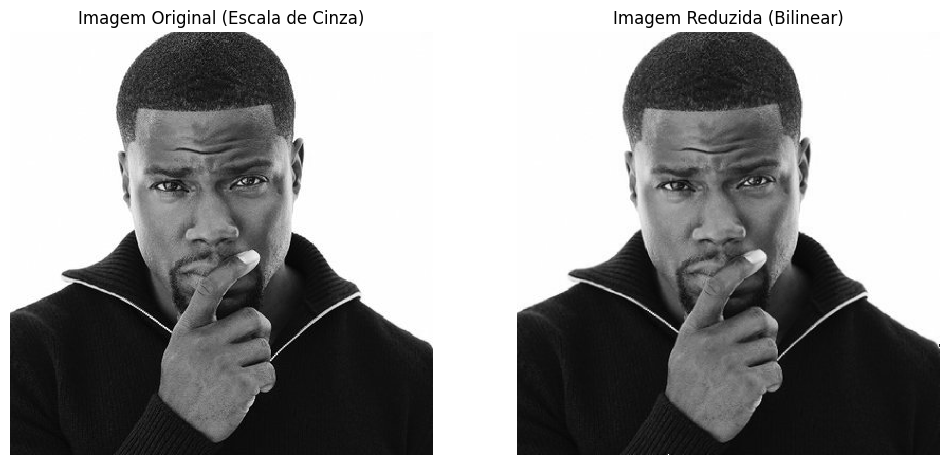

In [26]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def reduzir_imagem_bilinear_cinza(imagem, escala):
    # Obter as dimensões da imagem original
    altura_original, largura_original = imagem.shape
    nova_altura = int(altura_original * escala)
    nova_largura = int(largura_original * escala)

    # Inicializa a nova imagem com zeros
    nova_imagem = np.zeros((nova_altura, nova_largura), dtype=np.uint8)

    # Calcula as escalas para x e y
    escala_x = largura_original / nova_largura #0.5
    escala_y = altura_original / nova_altura

# 3. Terceiro Pixel da Imagem Reduzida (0, 2)
# Novo Pixel: (i=0, j=2)
# Mapeamento para o Original:
# x_mapeado = (2 + 0.5) * 2 - 0.5 = 4.5
# y_mapeado = (0 + 0.5) * 2 - 0.5 = 0.5
# x_int = int(4.5) = 4
# y_int = int(0.5) = 0
# Vizinhos:
# a = dados[0][4] = 30
# b = dados[0][5] = 30
# c = dados[1][4] = 20
# d = dados[1][5] = 30
# Interpolação:
# pixel_interpolado = 30 * (1-0.5) * (1-0.5) + 30 * 0.5 * (1-0.5) + 20 * (1-0.5) * 0.5 + 30 * 0.5 * 0.5 = 27.5
    for linha in range(nova_altura):
        for coluna in range(nova_largura):
            # Mapeia o pixel da nova imagem para a posição correspondente na imagem original
            #1,5
            y_mapeado = linha / escala # 1 / 2 = 0.5
            x_mapeado = coluna / escala # 5 / 2 = 2.5

            # Converte para valores inteiros para acessar os pixels vizinhos
            y_int = int(y_mapeado) #0
            x_int = int(x_mapeado) #2

            # Previne o acesso a pixels fora dos limites da imagem original
            y_int = min(y_int, altura_original - 2)
            x_int = min(x_int, largura_original - 2)

            # Calcula as diferenças para interpolação
            y_diferenca = y_mapeado - y_int # 0.5
            x_diferenca = x_mapeado - x_int # 0.5
            # Pixels vizinhos
            pixel_topo_esquerda = imagem[y_int, x_int] # 0,0
            pixel_topo_direita = imagem[y_int, x_int + 1] # 0,1
            pixel_base_esquerda = imagem[y_int + 1, x_int]#1,0
            pixel_base_direita = imagem[y_int + 1, x_int + 1]#1,1
         

            # Calcula a interpolação bilinear
            pixel_interpolado = (
                pixel_topo_esquerda * (1 - x_diferenca) * (1 - y_diferenca) + #40 * (1 - 0,5) * (1-0.5) 10
                pixel_topo_direita * x_diferenca * (1 - y_diferenca) + # 20 * 0,5 * (1 - 0.5) = 5
                pixel_base_esquerda * (1 - x_diferenca) * y_diferenca + # 54 * (1-0.5) * 0.5 = 13,5
                pixel_base_direita * x_diferenca * y_diferenca # 30 * 0.5 * 0.5 = 7.5
            ) # TOTAL: 36
        
            # Define o valor interpolado no pixel da nova imagem
            nova_imagem[linha, coluna] = pixel_interpolado.astype(np.uint8)

    return nova_imagem

# Carregar a imagem em escala de cinza (substitua 'img/Kevin-hart.jpg' pelo caminho da sua imagem)
imagem = cv2.imread('img/Kevin-hart.jpg', cv2.IMREAD_GRAYSCALE)

# Verificar se a imagem foi carregada corretamente
if imagem is None:
    print("Erro ao carregar a imagem.")
else:
    # Definir o fator de escala (por exemplo, reduzir para 50% do tamanho original)
    escala = 2

    # Aplicar a redução com interpolação bilinear
    imagem_reduzida = reduzir_imagem_bilinear_cinza(imagem, escala)

    # Mostrar informações da imagem original e da reduzida
    print(f"Dimensões da Imagem Original: {imagem.shape}")
    print(f"Dimensões da Imagem Reduzida: {imagem_reduzida.shape}")

    # Visualizar as imagens
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.title("Imagem Original (Escala de Cinza)")
    plt.imshow(imagem, cmap='gray', interpolation='nearest')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Imagem Ampliada (Bilinear)")
    plt.imshow(imagem_reduzida, cmap='gray', interpolation='nearest')
    plt.axis('off')

    plt.show()

    # Salvar a imagem reduzida
    cv2.imwrite('img/imagem_ampliada_bilinear.jpg', imagem_reduzida)
